In [1]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 52 kB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
     |████████████████████████████████| 449 kB 39.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=96b99083949eeefdddd71b44658c9fdcec25cbca8c3114abd47a87befb817f53
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalli

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0


# Loading the data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


base = '../input/face-expression-recognition-dataset/images/'

train_dir = os.path.join(base, 'train')
valid_dir = os.path.join(base, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

input_shape = (48,48,1)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Function for training, 
we often training with different model, so it is better to define a function which can define how the training works and the feedback that we expect in a single function

In [4]:
def train(model, train_dataset, valid_dataset):
    history = model.fit_generator(
              train_dataset,
              epochs=15,
              validation_data=valid_dataset
    )
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

# Model Definition

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

Epoch 1/15
451/451 [==============================] - 97s 216ms/step - loss: 1.6295 - acc: 0.3574 - val_loss: 1.4511 - val_acc: 0.4445
Epoch 2/15
451/451 [==============================] - 61s 136ms/step - loss: 1.3908 - acc: 0.4698 - val_loss: 1.3785 - val_acc: 0.4684
Epoch 3/15
451/451 [==============================] - 61s 136ms/step - loss: 1.2719 - acc: 0.5164 - val_loss: 1.2596 - val_acc: 0.5235
Epoch 4/15
451/451 [==============================] - 71s 157ms/step - loss: 1.1816 - acc: 0.5495 - val_loss: 1.2250 - val_acc: 0.5354
Epoch 5/15
451/451 [==============================] - 62s 136ms/step - loss: 1.0973 - acc: 0.5873 - val_loss: 1.2079 - val_acc: 0.5466
Epoch 6/15
451/451 [==============================] - 61s 136ms/step - loss: 1.0195 - acc: 0.6188 - val_loss: 1.1984 - val_acc: 0.5505
Epoch 7/15
451/451 [==============================] - 61s 135ms/step - loss: 0.9418 - acc: 0.6501 - val_loss: 1.1998 - val_acc: 0.5611
Epoch 8/15
451/451 [==============================] - 6

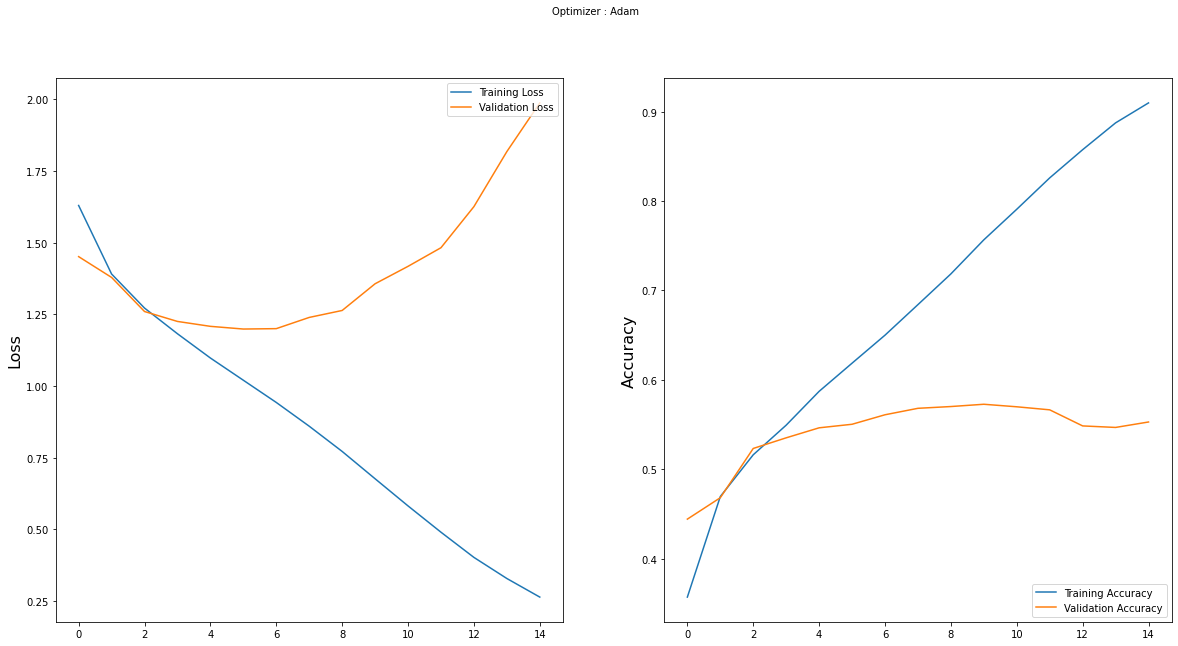

In [6]:
train(model, train_dataset, valid_dataset)

In [7]:
model.save('basic_cnn.h5')

## Basic CNN with drop out

In [8]:
cnn_do = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')
])

cnn_do.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

cnn_do.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

Epoch 1/15
451/451 [==============================] - 68s 151ms/step - loss: 1.6967 - acc: 0.3219 - val_loss: 1.5481 - val_acc: 0.4025
Epoch 2/15
451/451 [==============================] - 68s 151ms/step - loss: 1.5017 - acc: 0.4194 - val_loss: 1.4212 - val_acc: 0.4578
Epoch 3/15
451/451 [==============================] - 68s 150ms/step - loss: 1.4037 - acc: 0.4586 - val_loss: 1.3241 - val_acc: 0.5010
Epoch 4/15
451/451 [==============================] - 68s 150ms/step - loss: 1.3355 - acc: 0.4876 - val_loss: 1.2759 - val_acc: 0.5095
Epoch 5/15
451/451 [==============================] - 68s 151ms/step - loss: 1.2801 - acc: 0.5106 - val_loss: 1.2442 - val_acc: 0.5280
Epoch 6/15
451/451 [==============================] - 68s 150ms/step - loss: 1.2341 - acc: 0.5300 - val_loss: 1.2280 - val_acc: 0.5318
Epoch 7/15
451/451 [==============================] - 68s 151ms/step - loss: 1.1909 - acc: 0.5456 - val_loss: 1.1879 - val_acc: 0.5526
Epoch 8/15
451/451 [==============================] - 6

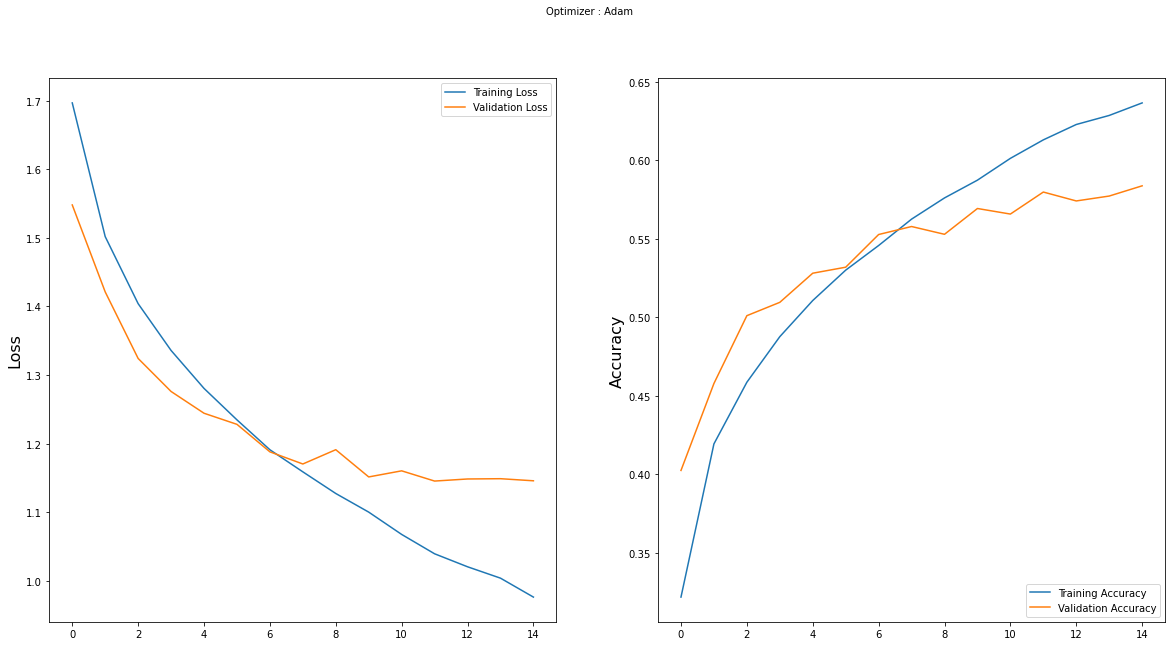

In [9]:
train(cnn_do, train_dataset, valid_dataset)
cnn_do.save('cnn_do.h5')

## Try with augmented dataset

In [10]:
train_data_aug = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=(-0.5, 0.5),
    height_shift_range=(-0.5, 0.5),
    fill_mode="nearest",
    
)

train_dataset_aug = train_data_aug.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.


Epoch 1/15
451/451 [==============================] - 77s 171ms/step - loss: 1.8180 - acc: 0.2395 - val_loss: 1.7170 - val_acc: 0.3447
Epoch 2/15
451/451 [==============================] - 77s 170ms/step - loss: 1.7773 - acc: 0.2616 - val_loss: 1.6621 - val_acc: 0.3433
Epoch 3/15
451/451 [==============================] - 77s 170ms/step - loss: 1.7447 - acc: 0.2778 - val_loss: 1.6248 - val_acc: 0.3827
Epoch 4/15
451/451 [==============================] - 77s 170ms/step - loss: 1.7227 - acc: 0.2940 - val_loss: 1.6564 - val_acc: 0.3555
Epoch 5/15
451/451 [==============================] - 75s 167ms/step - loss: 1.7088 - acc: 0.3047 - val_loss: 1.6469 - val_acc: 0.3705
Epoch 6/15
451/451 [==============================] - 76s 169ms/step - loss: 1.6960 - acc: 0.3114 - val_loss: 1.7459 - val_acc: 0.3225
Epoch 7/15
451/451 [==============================] - 81s 179ms/step - loss: 1.6769 - acc: 0.3194 - val_loss: 1.7817 - val_acc: 0.3439
Epoch 8/15
451/451 [==============================] - 7

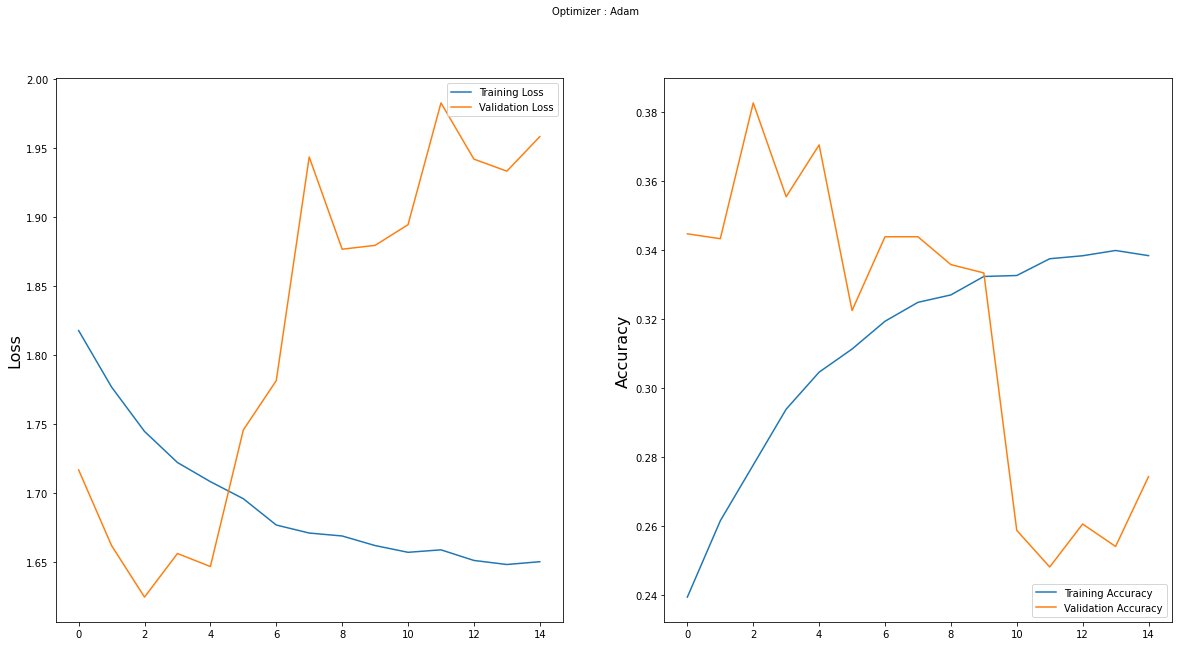

In [11]:
train(cnn_do, train_dataset_aug, valid_dataset)
cnn_do.save('cnn_do_aug.h5')

## Inference Function

In [12]:
cnn_do.input.shape.as_list()[1:]

[48, 48, 1]

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

class Inference():
    
    labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    def __init__(self, modelpath):
        try:
            self.model = load_model(modelpath)
        except:
            print("Model not Found")

        self.inp_shape = self.model.input.shape.as_list()

    def predict(self, image):
        image = self.preprocess(image)
        pred = self.model.predict(image)
        pred = np.argmax(pred)
        return self.labels[pred]

    def preprocess(self, image):
        image = resize(image, (self.inp_shape[1], self.inp_shape[2]))
        image = rgb_to_grayscale(image)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        return image
    
inference = Inference('./cnn_do.h5')

ModuleNotFoundError: No module named 'tensorflow.image'

In [14]:
from keras.preprocessing.image import load_img

test_image = '../input/face-expression-recognition-dataset/images/train/surprise/10007.jpg'
img = load_img(test_image)
img = tf.keras.preprocessing.image.img_to_array(img)
inference.predict(img)

Using TensorFlow backend.


NameError: name 'inference' is not defined

In [15]:
dummy_image = np.random.random((50,50,3))
inference = Inference('./cnn_do.h5')
print(inference.predict(dummy_image))

NameError: name 'np' is not defined